<a href="https://colab.research.google.com/github/samsomsabu/NATURAL-LANGUAGE-PROCESSING/blob/main/Samson_549_Lab8_RNN_Weather_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **What is Recurrent neural network(RNN)?**
RNN is a deep learning model that is used for Time-series prediction, speech recognition, etc. Unlike traditional neural networks, recurrent networks use their memory(also called states) to predict sequence outputs. In simple words, RNN is used when we want to predict a future outcome based on the previous sequential inputs

importing libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
#for Building the RNN
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam


loading dataset

In [2]:
df = pd.read_csv('/content/seattle-weather.csv')

getting the first five entries

In [3]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


checking for null values

In [4]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

checking for duplicate values |

In [5]:
df.duplicated().sum()

0

converting to numpy array

In [6]:
training_set = df.iloc[:,2:3].values
training_set

array([[12.8],
       [10.6],
       [11.7],
       ...,
       [ 7.2],
       [ 5.6],
       [ 5.6]])

length of the numpy array

In [7]:
len(training_set)

1461

converting dataset into input-output pairs or user defined method for splittingt the dataset into train,test,validation

In [9]:
def df_to_XY(df,window_size=10):
 X_train=[]
 y_train=[]

 for i in range(10,len(training_set)):
    X_train.append(training_set[i-10:i,0])
    y_train.append(training_set[i,0])

 X_train, y_train = np.array(X_train), np.array(y_train)
 return X_train, y_train

the use of the user defined split

In [10]:
WINDOW = 10
X,y = df_to_XY(df,WINDOW)
print(len(X),len(y))
X_train = X[:800]
y_train = y[:800]
X_val = X[800:1000]
y_val = y[800:1000]
X_test = X[1000:]
x_test = y[1000:]

1451 1451


 reshaping the training, validation, and test datasets to add a new dimension for their use in the recurrent neural network

In [11]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_val = np.reshape(X_val,(X_val.shape[0],X_val.shape[1],1))
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))


building an RNN model

In [13]:
regressor = Sequential()

define the layers in our RNN.

 We will create a sequential model by adding layers sequentially using sequential(). The first layer is an LSTM with 50 memory units, return_sequence=True means that the last output in the output sequence is returned and the input_shape describes the structure of the input. Four LSTM layers are created, with each returning sequences to the subsequent layer.
Dropout regularization with a rate of 0.2 is applied after each LSTM layer to reduce overfitting.
The output layer consists of a single neuron with a linear activation function, suitable for regression tasks.

In [14]:
#Addinf the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50, return_sequences = True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

#Output layer
regressor.add(Dense(units=1))

compilation

In [15]:
#Compiling
regressor.compile(optimizer='adam',loss='mean_squared_error')

fitting the rnn to the training set

In [17]:
history=regressor.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=100, batch_size=32)

Epoch 1/100
25/25 [==============================] - 11s 91ms/step - loss: 208.4398 - val_loss: 269.7589
Epoch 2/100
25/25 [==============================] - 1s 22ms/step - loss: 108.1880 - val_loss: 192.9402
Epoch 3/100
25/25 [==============================] - 1s 22ms/step - loss: 83.3549 - val_loss: 158.8337
Epoch 4/100
25/25 [==============================] - 1s 23ms/step - loss: 71.0748 - val_loss: 136.1839
Epoch 5/100
25/25 [==============================] - 1s 34ms/step - loss: 64.2444 - val_loss: 119.1093
Epoch 6/100
25/25 [==============================] - 1s 37ms/step - loss: 59.4148 - val_loss: 107.1330
Epoch 7/100
25/25 [==============================] - 1s 38ms/step - loss: 57.0461 - val_loss: 97.0577
Epoch 8/100
25/25 [==============================] - 1s 21ms/step - loss: 55.4873 - val_loss: 90.3191
Epoch 9/100
25/25 [==============================] - 1s 22ms/step - loss: 55.3001 - val_loss: 86.2532
Epoch 10/100
25/25 [==============================] - 1s 22ms/step - loss

In [18]:
his = pd.DataFrame(history.history)

In [19]:
his.head()

,loss,val_loss
0,208.439850,269.758881
1,108.188026,192.940247
2,83.354889,158.833710
3,71.074829,136.183929
4,64.244362,119.109344


plot training and validation loss against each other

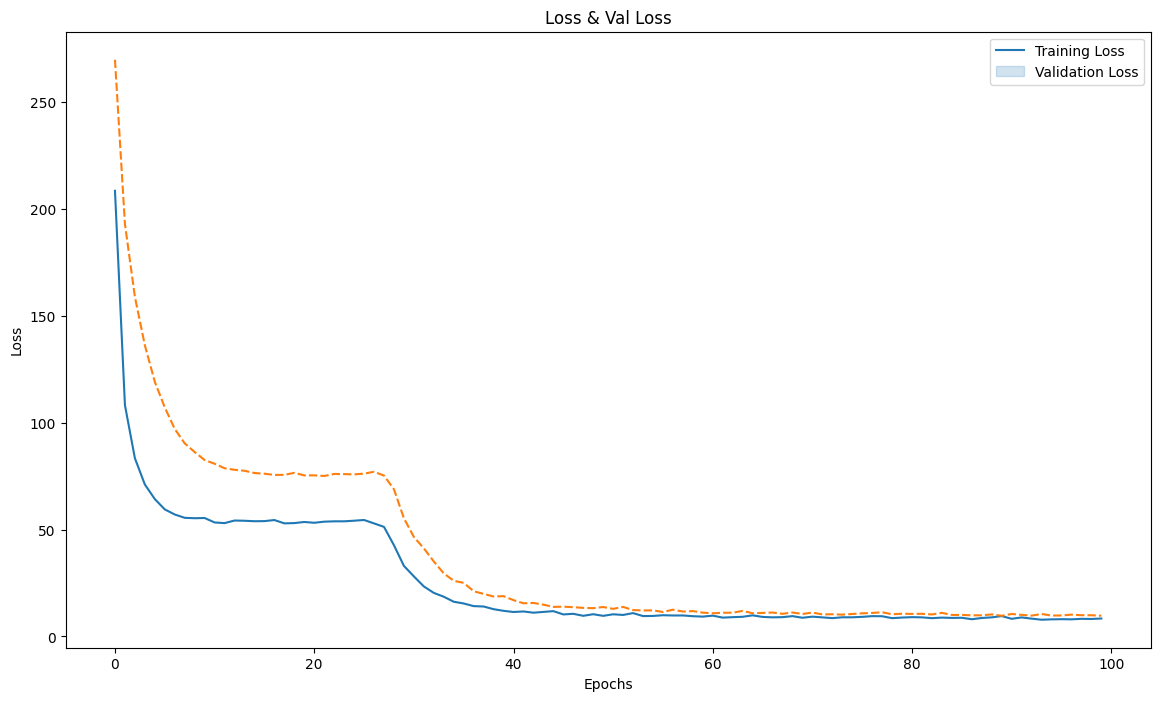

In [23]:
plt.figure(figsize=(14, 8))
plt.title("Loss & Val Loss")
sns.lineplot(data=history_loss)

# Add labels and legend
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Training Loss", "Validation Loss"])

# Show the plot
plt.show()


flatten the model

In [24]:
train_pred = regressor.predict(X_train).flatten()
val_pred = regressor.predict(X_val).flatten()
test_pred = regressor.predict(X_test).flatten()

15/15 [==============================] - 0s 16ms/step


 visualize and compare the predicted and actual maximum temperature value

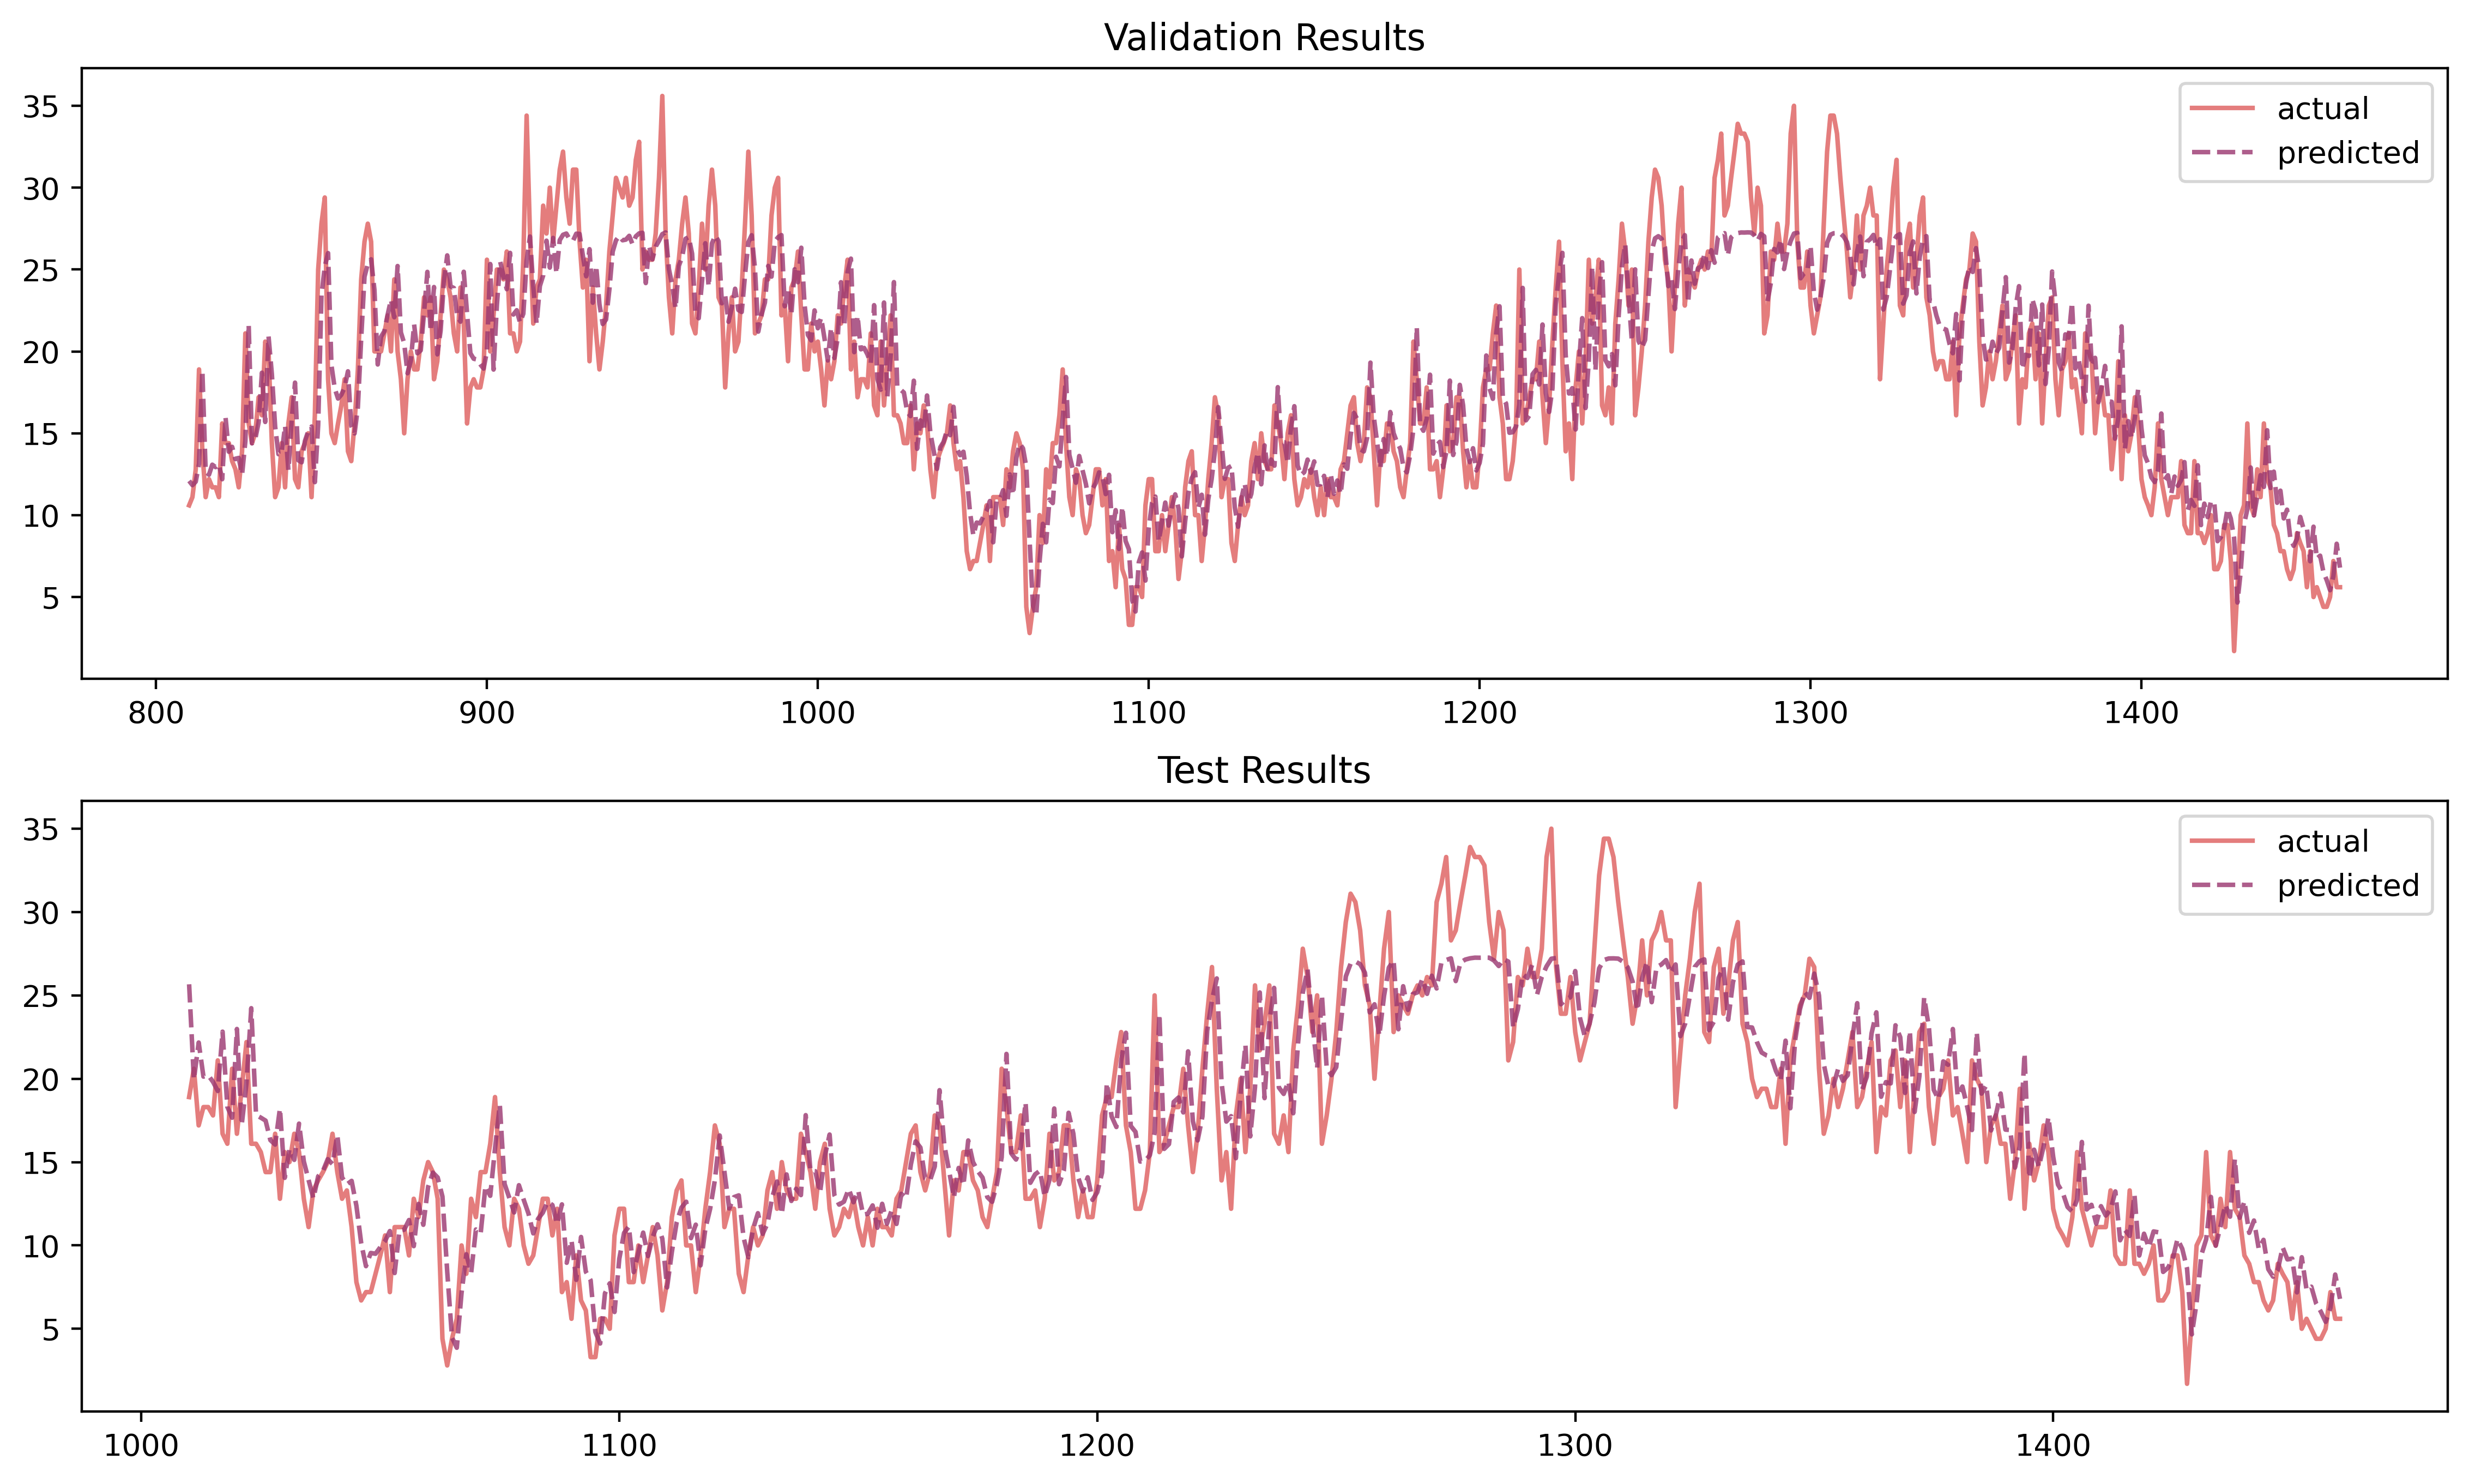

In [25]:
pred = np.concatenate([train_pred,val_pred,test_pred])
df_pred = pd.DataFrame(df["temp_max"].copy())
df_pred.columns=["actual"]
df_pred = df_pred[WINDOW:]
df_pred["predicted"] = pred

fig,axes = plt.subplots(2,1,figsize=(14,8),dpi=400)

plt.subplot(2,1,1)
plt.title("Validation Results")
sns.lineplot(df_pred[800:],alpha=0.8,palette="flare",linestyle=None);

plt.subplot(2,1,2)
plt.title("Test Results")
sns.lineplot(df_pred[1000:],alpha=0.8,palette="flare",linestyle=None);